## NMPP rezultatų duomenų rinkinys

Notebook'as skirtas identifikuoti kokybės problemas, susijusias su NMPP rezultatų duomenų rinkiniu.

Rinkinio aprašymas: Pilnai nuasmeninti populiaciniai Nacionalinių mokinių pasiekimų patikrinimų (NMPP) duomenys pateikiami pagal metus, savivaldybę, vietovės tipą, institucijos mokomąją kalbą, lytį, amžių, klasę, pasiekimo tipą, lygį, surinktus taškus

Aktualios nuorodos:
- [Rinkinys](https://data.gov.lt/datasets/1930)
- [Apie NMPP](https://www.nsa.smm.lt/egzaminai-ir-pasiekimu-patikrinimai/nmpp/aktualijos/)

Duomenų kokybės bei dokumentacijos problemos su rinkiniu:
- Rinkinio aprašyme nepaminėtas kodavimas (`windows-1257`);
- 2017-2018 mokslo metai turi sunkiai interpretuojamų reikšmių taškų stulpelyje.
- Yra kelios "atsitiktinės" eilutės, pvz. tik trys eilutės iš 2021-2022 mokslo metų antros klasės.
- Duomenys suagreguoti pagal visus stulpelius, kas apsunkina duomenų naudojimą.


In [2]:
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None


In [3]:
# https://data.gov.lt/datasets/1930/#info
dataset_url = "https://data.gov.lt/media/filer_public/ca/90/ca907745-4d59-47f2-bf28-c4617f433ecf/3058_mokiniu_pasiekimai_nmpp-1930.csv"
df = pd.read_csv(dataset_url, encoding='windows-1257', sep=";", low_memory=False)


In [4]:
df.sample(5)

,PAS Mokslo metai,PAS Institucijos savivaldybės ID,PAS Institucijos savivaldybė,PAS Institucijos vietovės tipo kodas,PAS Institucijos vietovės tipas,PAS Institucijos mokomosios kalbos ID,PAS Institucijos mokomosios kalbos,PAS Lyties ID,PAS Lytis,PAS Amžiaus ID,PAS Amžius,PAS Klasės numerio ID,PAS Klasė,PAS Pasiekimo tipo ID,PAS Pasiekimo tipas,PAS NMPP lygis,PAS NMPP taškai,PAS Mokinių skaičius
61416,2017-2018,413,Ignalinos r. sav.,m.,Miestas,1,lietuvių,1,Berniukai,8,8,2,2,501,Matematika (taškai),Didelė rizika (grėsmė) tolesniam mokymuisi,"369,69",1
316977,2017-2018,426,Molėtų r. sav.,m.,Miestas,1,lietuvių,2,Mergaitės,12,12,6,6,115,Skaitymas (analizavimas),Patenkinamas,"272,6",1
52505,2017-2018,3,Druskininkų sav.,m.,Miestas,1,lietuvių,1,Berniukai,10,10,4,4,507,Skaitymas (taškai),Patenkinamas,"425,043",1
618624,2017-2018,163,Vilkaviškio r. sav.,m.,Miestas,1,lietuvių,2,Mergaitės,11,11,6,6,510,Matematika (taškai),Pagrindinis,"491,416",1
544096,2017-2018,526,Švenčionių r. sav.,m.,Miestas,12,rusų ir lenkų,1,Berniukai,10,10,4,4,96,Pasaulio pažinimas: žinios ir supratimas,Pagrindinis,"525,517",1


In [5]:
column_mapping = {
    'PAS Mokslo metai': 'mokslo_metai',
    'PAS Institucijos savivaldybės ID': 'savivaldybes_id',
    'PAS Institucijos savivaldybė': 'savivaldybe',
    'PAS Institucijos vietovės tipo kodas': 'vietoves_tipo_kodas',
    'PAS Institucijos vietovės tipas': 'vietoves_tipas',
    'PAS Institucijos mokomosios kalbos ID': 'mokomosios_kalbos_id',
    'PAS Institucijos mokomosios kalbos': 'mokomosios_kalbos',
    'PAS Lyties ID': 'lyties_id',
    'PAS Lytis': 'lytis',
    'PAS Amžiaus ID': 'amziaus_id',
    'PAS Amžius': 'amzius',
    'PAS Klasės numerio ID': 'klases_numerio_id',
    'PAS Klasė': 'klase',
    'PAS Pasiekimo tipo ID': 'pasiekimo_tipo_id',
    'PAS Pasiekimo tipas': 'pasiekimo_tipas',
    'PAS NMPP lygis': 'lygis',
    'PAS NMPP taškai': 'taskai',
    'PAS Mokinių skaičius': 'mokiniu_skaicius'
}

In [6]:
df = df.rename(columns=column_mapping)

In [7]:
df["patikrinimo_metai"] = df["mokslo_metai"].str.split("-").str[1]

### 2017-2018 mokslo metai

In [8]:
df.value_counts("mokslo_metai")

mokslo_metai
2017-2018    763281
2018-2019     63084
2021-2022     56353
2022-2023     27971
2020-2021     24430
Name: count, dtype: int64

In [9]:
df[df["taskai"].str.contains(",", na=False)].value_counts("mokslo_metai")


mokslo_metai
2017-2018    751219
Name: count, dtype: int64

In [10]:
df = df[df["mokslo_metai"] != "2017-2018"]


In [11]:
df["taskai"] = df["taskai"].astype(int)

### Labai retos reikšmės

In [12]:
df.value_counts(["patikrinimo_metai", "klase"], sort=False)


patikrinimo_metai  klase
2019               2        19928
                   4        24626
                   6        18530
2021               4        11257
                   8        13173
2022               2            3
                   4        18063
                   6        11811
                   8        26476
2023               4        13920
                   6            1
                   8        14050
Name: count, dtype: int64

In [13]:
df = df[~(((df["patikrinimo_metai"] == "2022") & (df["klase"] == 2)) | (
    (df["patikrinimo_metai"] == "2023") & (df["klase"] == 6)
))]


### Darom grafikėlį

In [14]:
(df["mokiniu_skaicius"] == 1).mean()

0.48443846968585963

In [15]:
df["pasiekimo_tipas"].value_counts()

pasiekimo_tipas
Matematika (taškai)                              53528
Skaitymas (taškai)                               43623
Matematika                                       14137
Pasaulio pažinimas (taškai)                      12659
Rašymas (taškai)                                 10378
Skaitymas                                         7103
Gamtos mokslai (taškai)                           6938
Socialiniai mokslai (taškai)                      6917
Lietuvių kalba ir literatūra. Skaitymas           5826
Rašymas (1 dalis - teksto kūrimas, taškai)        5005
Rašymas (2 dalis - kalbos supratimas, taškai)     4816
Gimtoji kalba (rusų).Skaitymas                     455
Gimtoji kalba (lenkų). Skaitymas                   433
Gimtoji kalba (baltarusių). Skaitymas               16
Name: count, dtype: int64

In [ ]:
df_mat = df[
    df["pasiekimo_tipas"].str.contains("Matematika")
    & df["klase"].isin([4, 8])
    & df["patikrinimo_metai"].isin(["2021", "2022", "2023"])
]

In [17]:
# Labai nepatogu!!!
df_mat["mokiniai_taskai"] = df_mat["taskai"] * df_mat["mokiniu_skaicius"]
df_mat_agg = df_mat.groupby(["patikrinimo_metai", "klase"]).agg(
    {"mokiniu_skaicius": "sum", "mokiniai_taskai": "sum"}
).reset_index()

In [18]:
df_mat_agg["tasku_vidurkis"] = df_mat_agg["mokiniai_taskai"] / df_mat_agg["mokiniu_skaicius"]

In [229]:
df_mat_agg

,patikrinimo_metai,klase,mokiniu_skaicius,mokiniai_taskai,tasku_vidurkis
0,2021,4,24195,652316,26.960777
1,2021,8,21549,636805,29.551487
2,2022,4,24716,572451,23.161151
3,2022,8,23943,458792,19.161843
4,2023,4,26118,581828,22.276897
5,2023,8,25970,569716,21.937466


(0.0, 35.0)

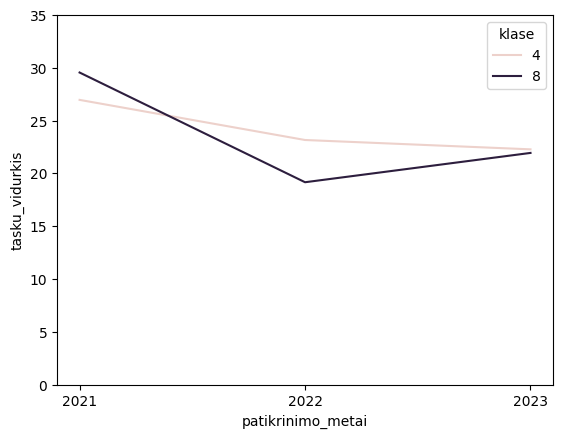

In [ ]:
ax = sns.lineplot(data=df_mat_agg, x="patikrinimo_metai", y="tasku_vidurkis", hue="klase")
ax.set_ylim(0, 35)
# Grafikas iliustracinis (pavyzdžiui, neaišku koks buvo didžiausias galimas taškų skaičius kiekvienais metais)
